<a href="https://www.kaggle.com/code/alejandravillarreal/arc-applying-algebra-to-eda?scriptVersionId=188764699" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Application of simple subtraction in training pairs**

This notebook is only using examples of square matrices with the same dimensions
the data set contains other distributions.

Plotting examples with numbers allows us to see the mathematical distribution of the examples, and subtraction helps us see the difference between input and output.

credits:

colors: https://www.kaggle.com/code/mehrankazeminia/3-arc24-developed-2020-winning-solutions

full dataset: 
https://www.kaggle.com/datasets/alejandravillarreal/arc-2024-training-explamples-by-form/data

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib import colors

In [2]:
base_path='/kaggle/input/arc-prize-2024/'
# Loading JSON data
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [3]:
#The dataset contains others csv files with different distributions
#This notebook is only using examples of square matrices with the same dimensions

df = pd.read_csv("/kaggle/input/arc-2024-training-explamples-by-form/equals_squared_train.csv")   
training_challenges   = load_json(base_path +'arc-agi_training_challenges.json')

## Extracting Input, output and subtraction  

In [4]:
#matrix reader 
def get_matrix_pair(challenge):
    x = pd.DataFrame(challenge['input'])
    y = pd.DataFrame(challenge['output'])
    
    #only is a subtraction but you can change it for another operation
    z = y - x
    return x, y, z

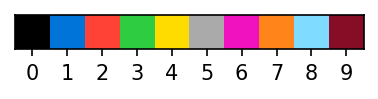

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(3, 1), dpi=150)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

# heatmap with numbers

In [6]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

#adding text of numbers to heatmap
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [7]:
def ploting_exercices(challenge, x,y,z):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(challenge)
    cmap = colors.ListedColormap(['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
                                      '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    ax1.imshow(x, cmap=cmap, norm=norm)
    ax1.set_title('Input')
    ax2.imshow(y, cmap=cmap, norm=norm)
    ax2.set_title('Output')
    ax3.imshow(z, cmap=cmap, norm=norm)
    ax3.set_title('(output) - (input)')
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(x[0])):
        for j in range(len(x[0])):
            text = ax1.text(i, j, x[i][j],
                           ha="center", va="center", color="r", size= 15)
    
    for i in range(len(x[0])):
        for j in range(len(x[0])):
            text = ax2.text(i, j, y[i][j],
                           ha="center", va="center", color="r", size=15)
    
    for i in range(len(x[0])):
        for j in range(len(x[0])):
            text = ax3.text(i, j, z[i][j],
                           ha="center", va="center", color="r", size=15)
    
    
    fig.tight_layout()
    plt.show()

# Plotting 10 examples


left to right
* plot 1 = input
* plot 2 = output
* plot 3 = output - input

In [8]:
# just 10 examples but this csv cointains all the training examples squared and equals
batch_1 = df['id'][0:10]  

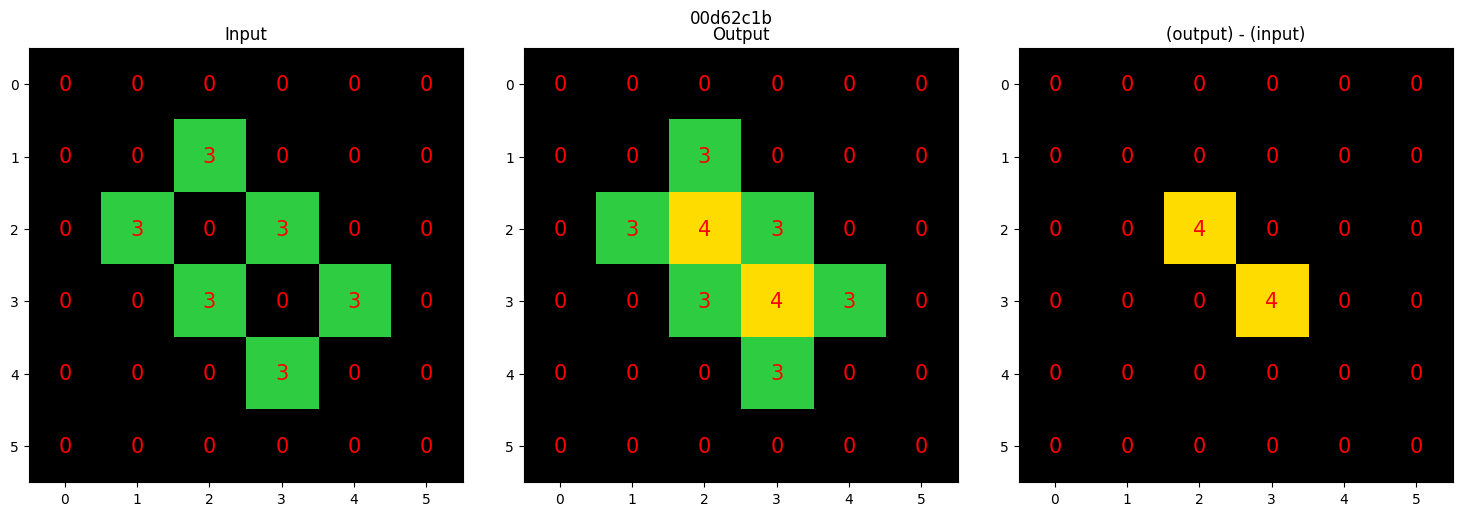

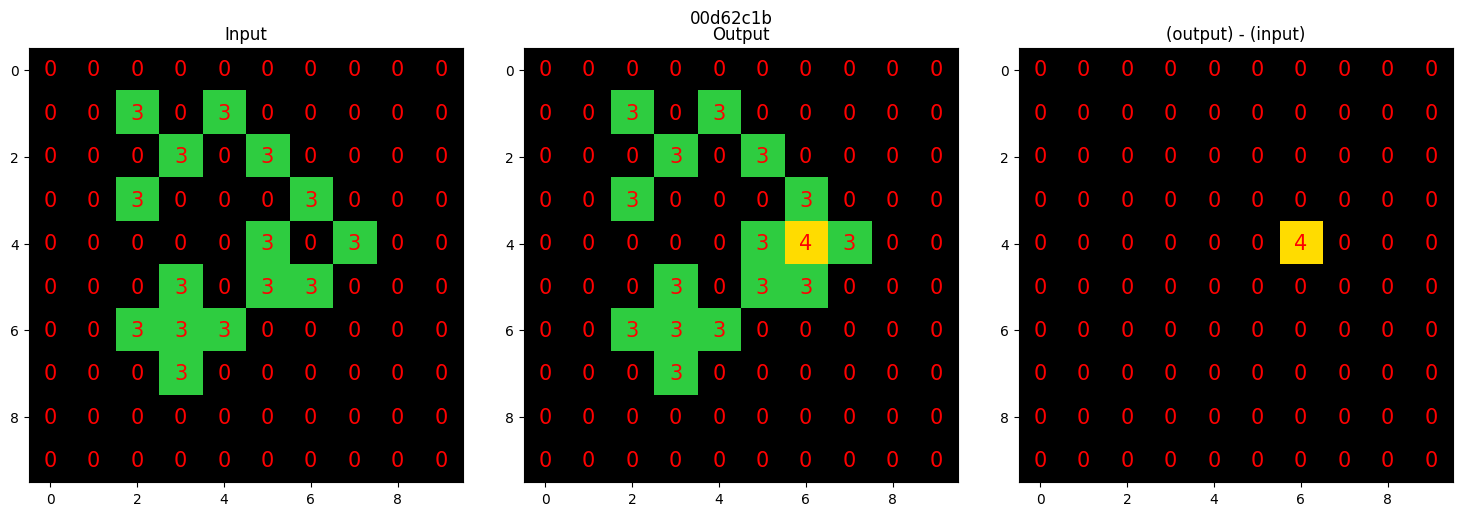

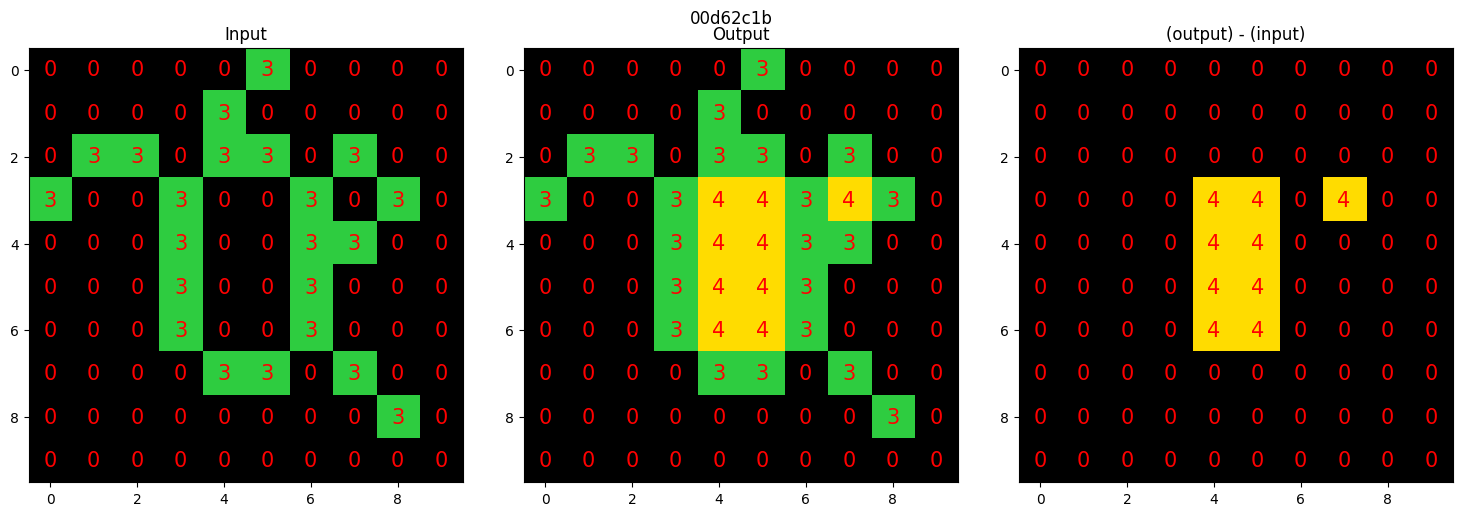

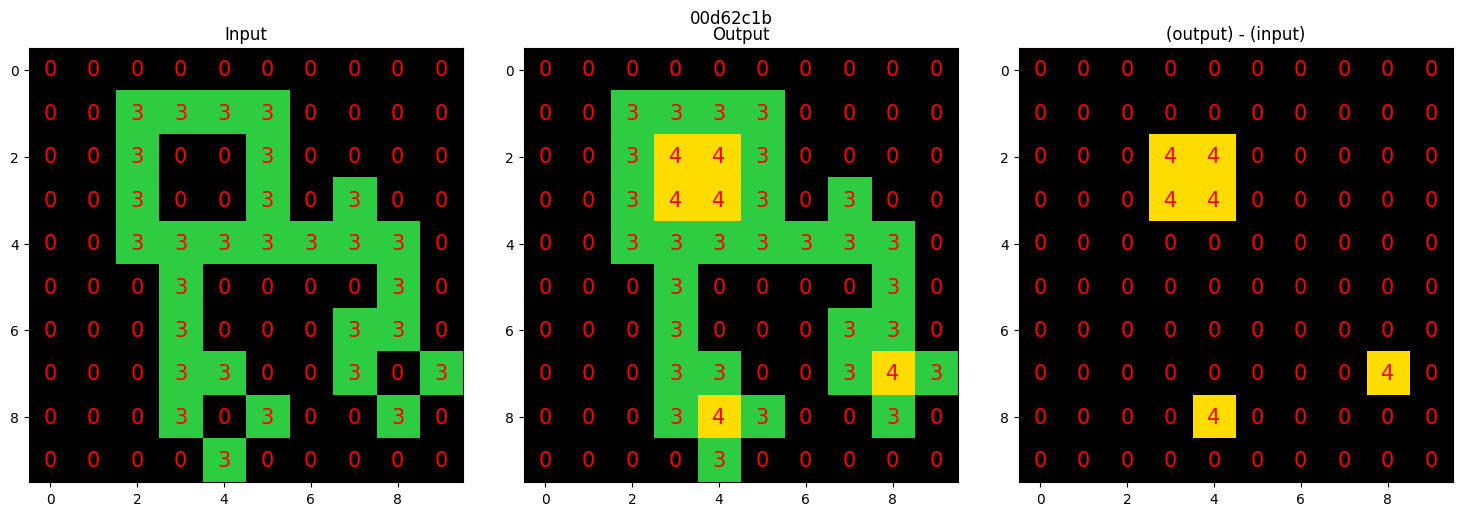

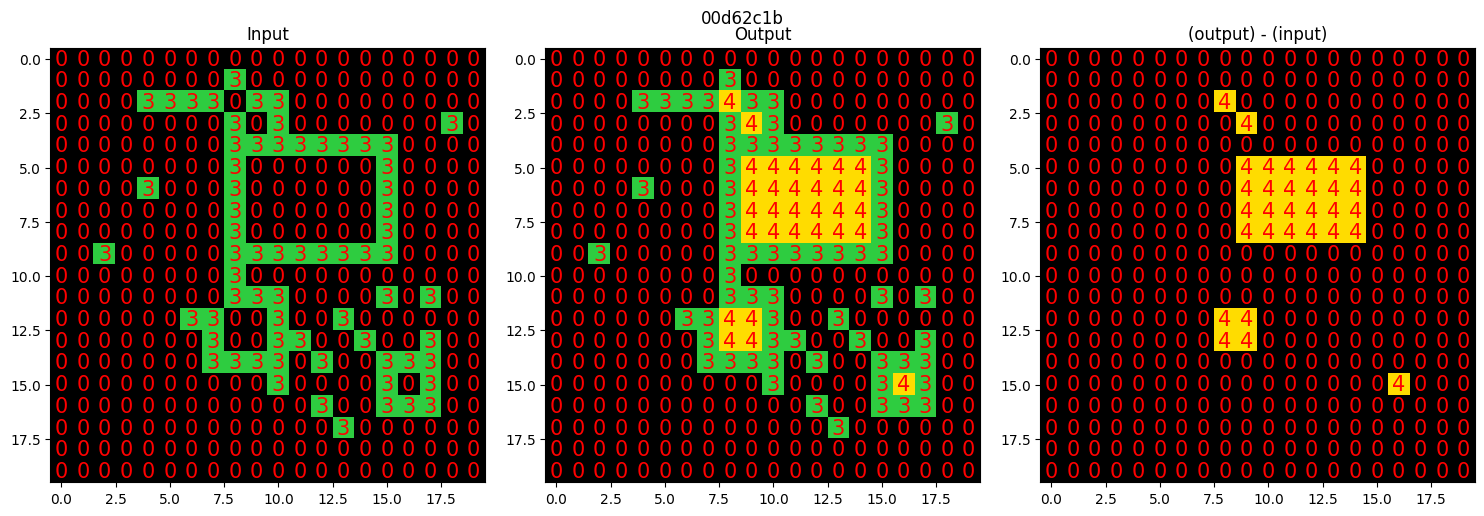

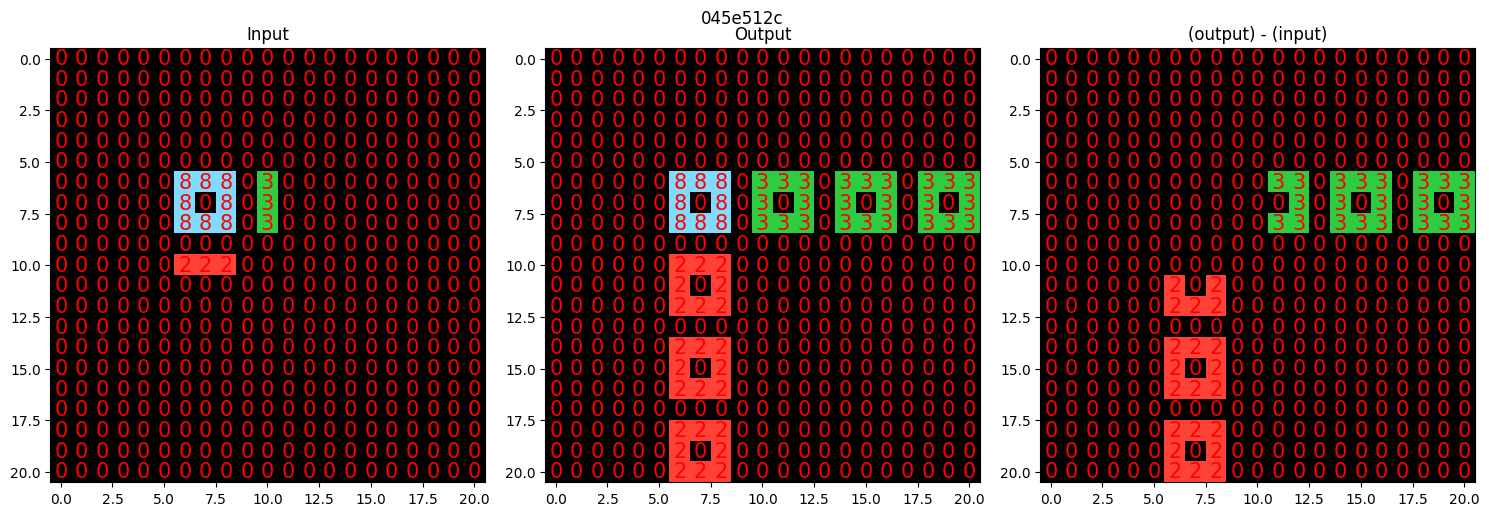

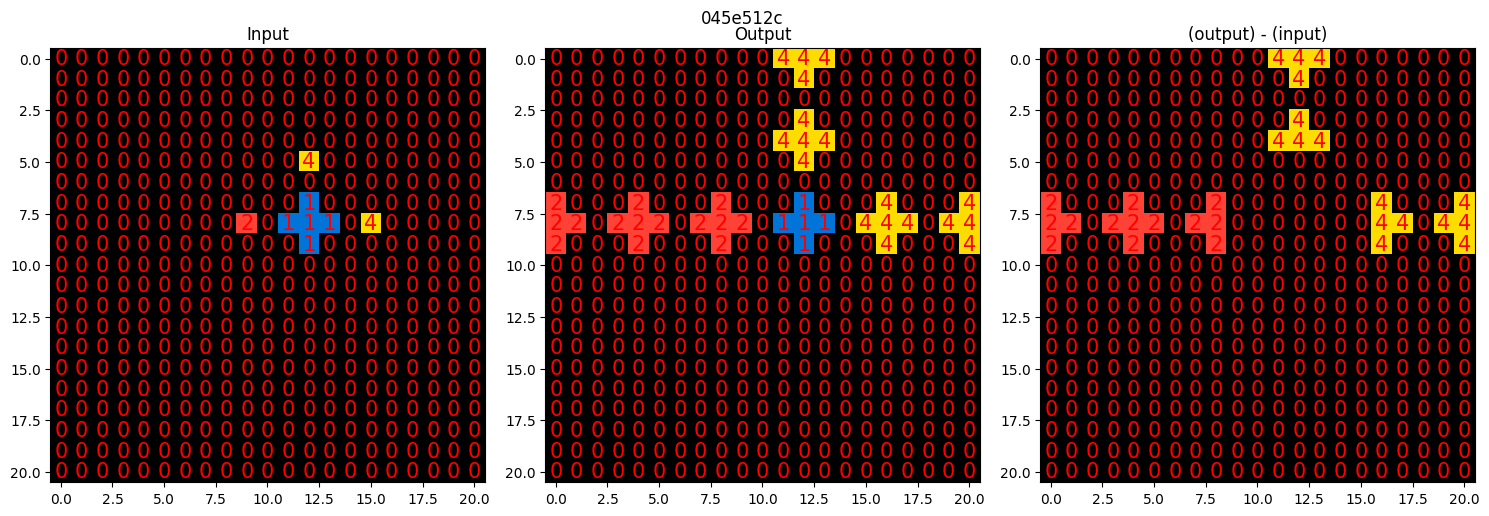

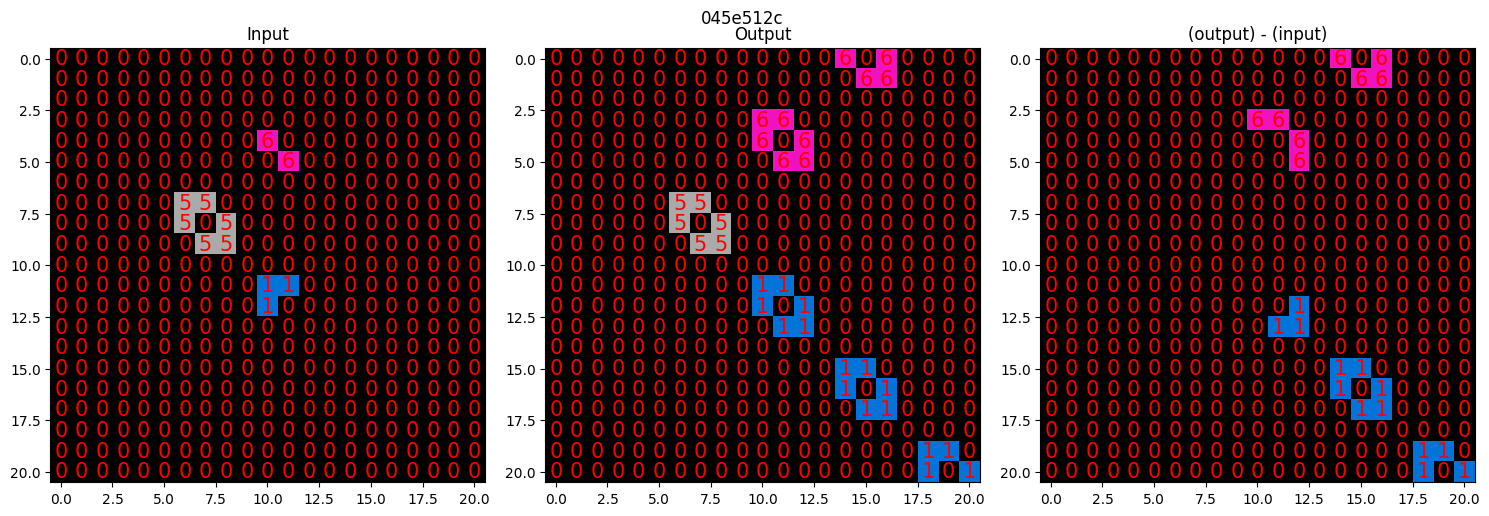

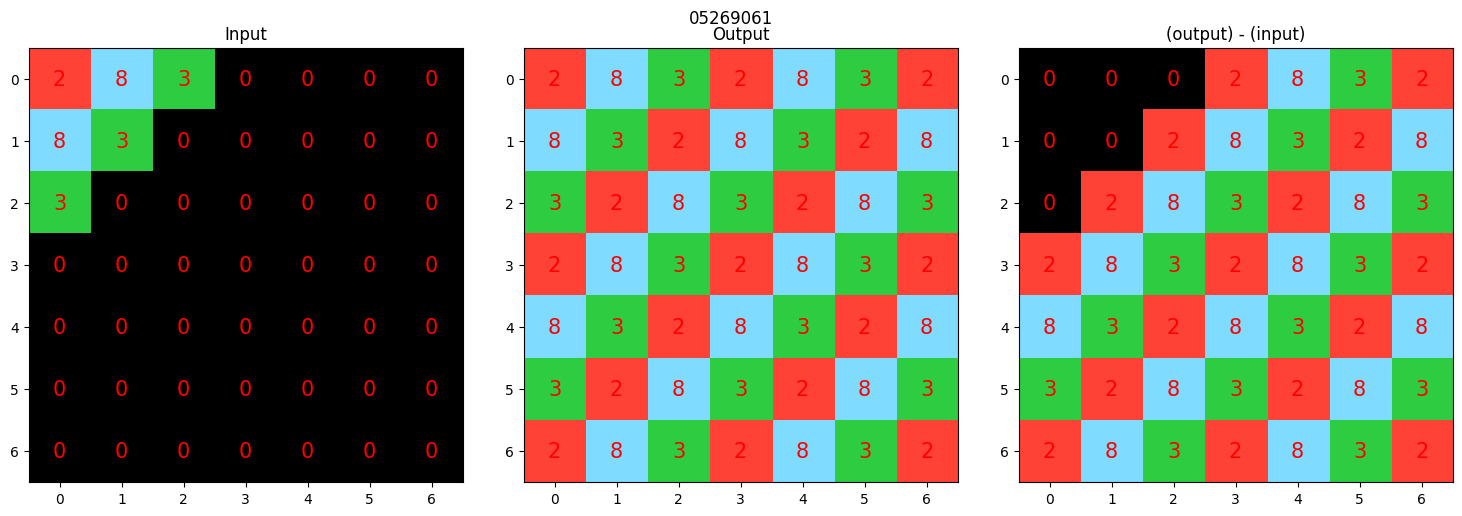

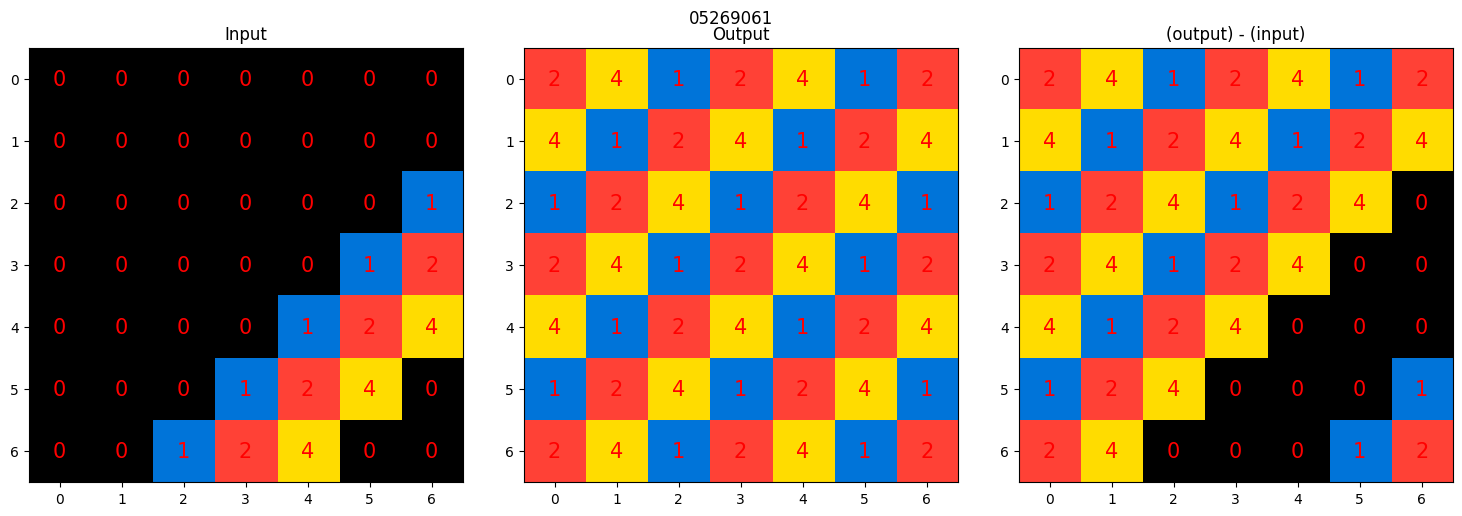

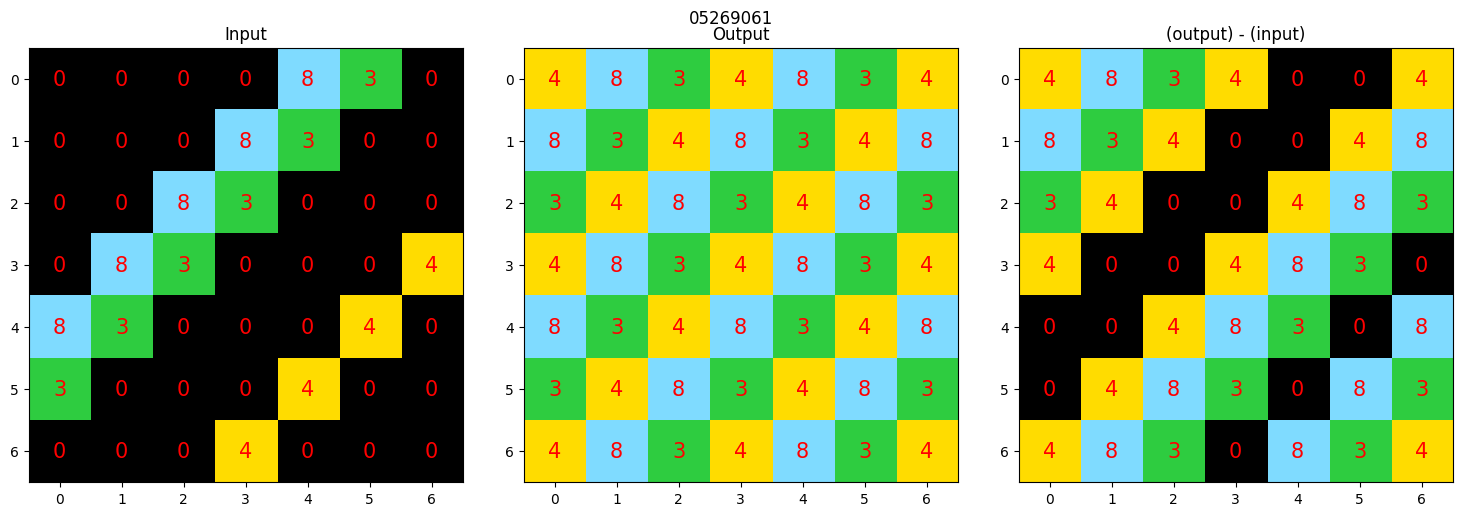

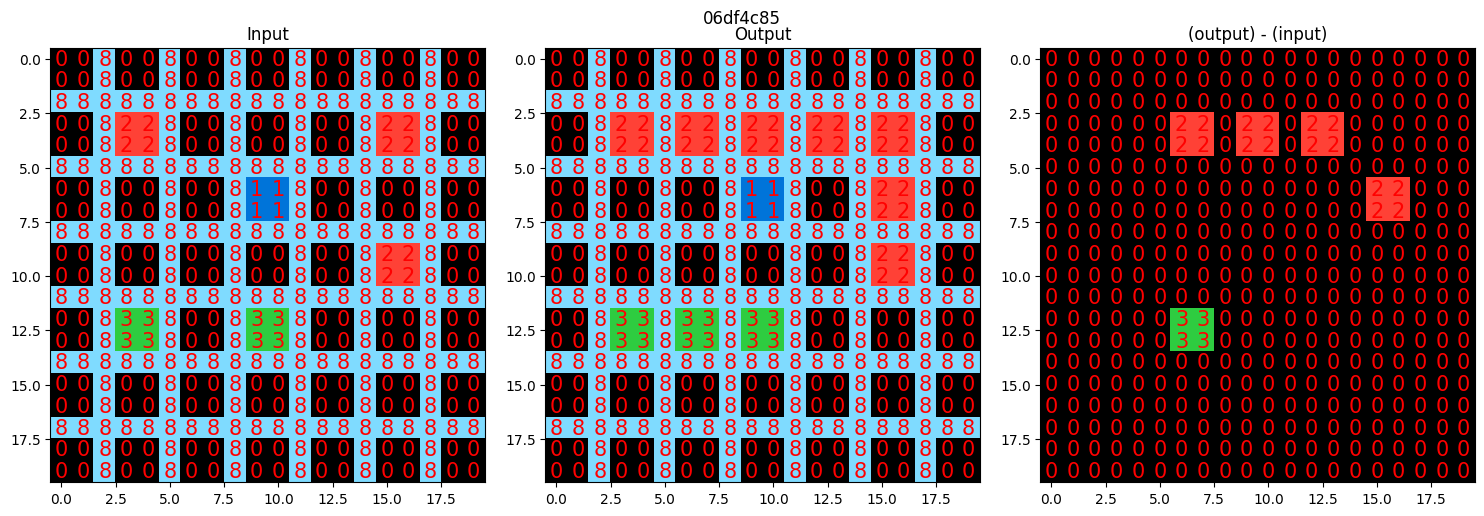

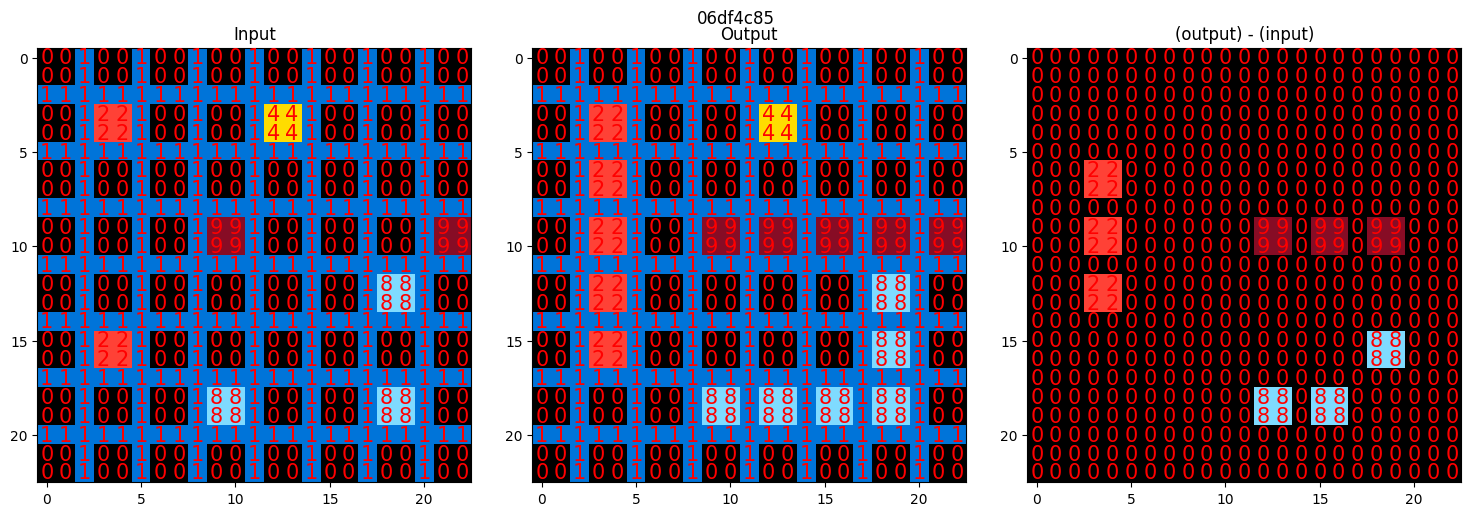

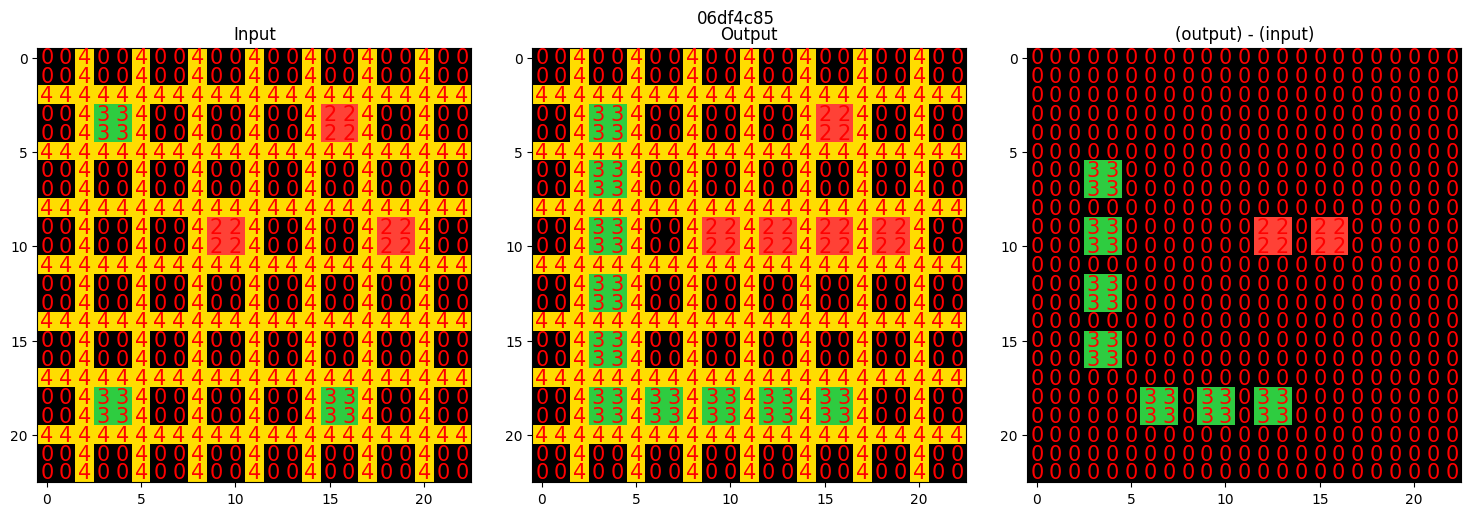

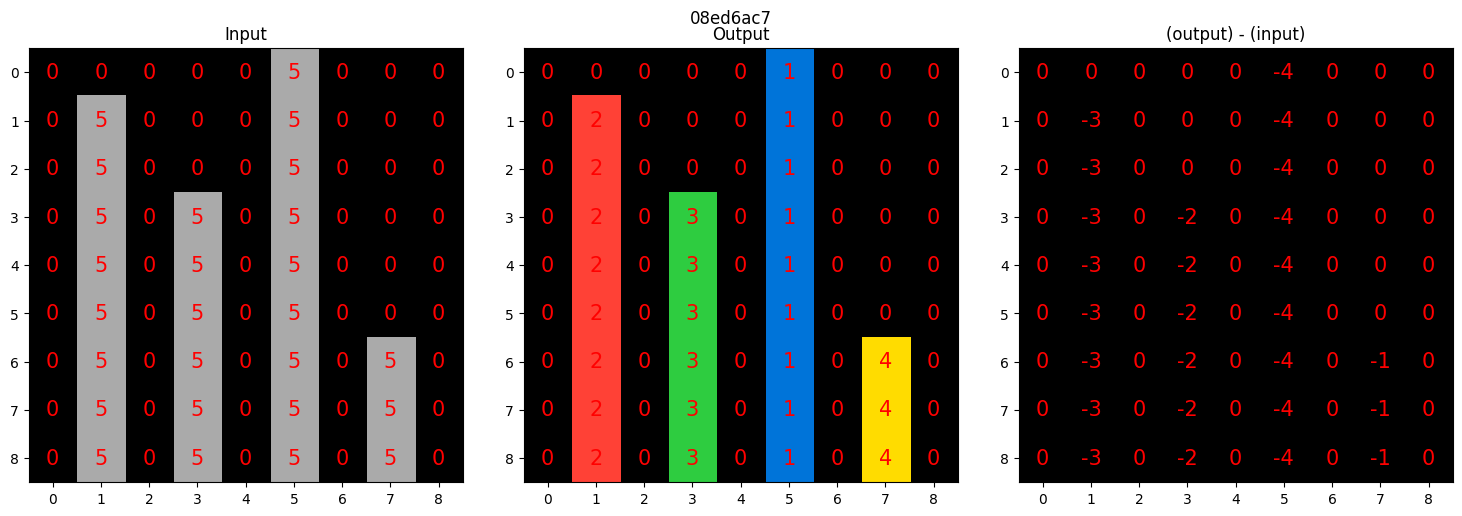

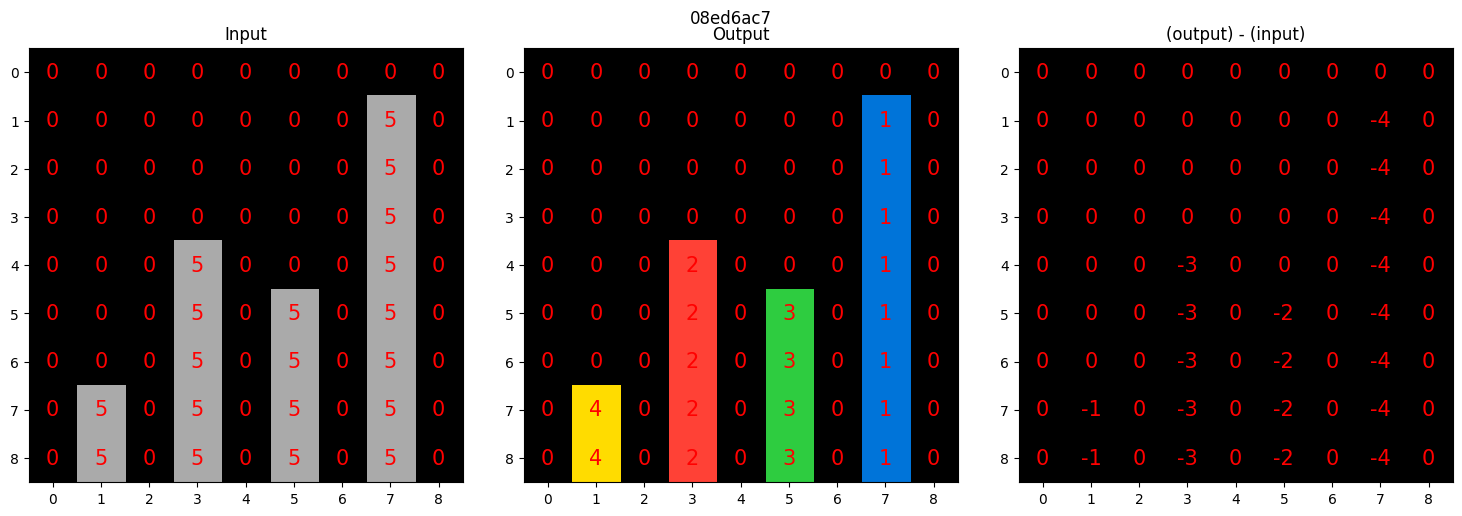

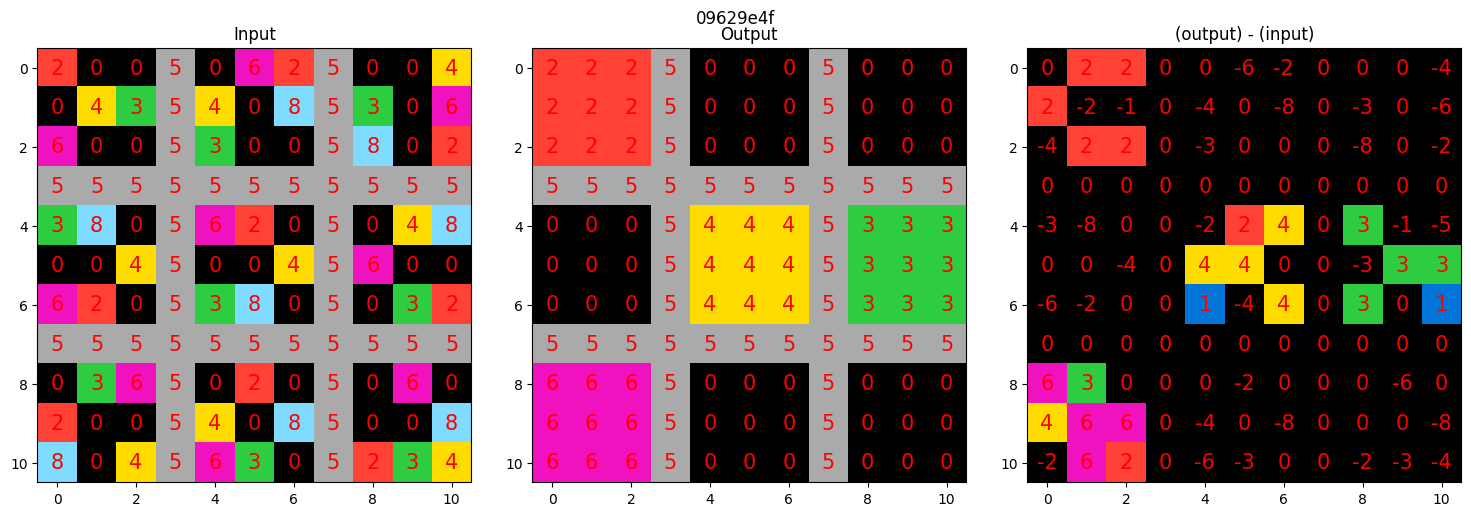

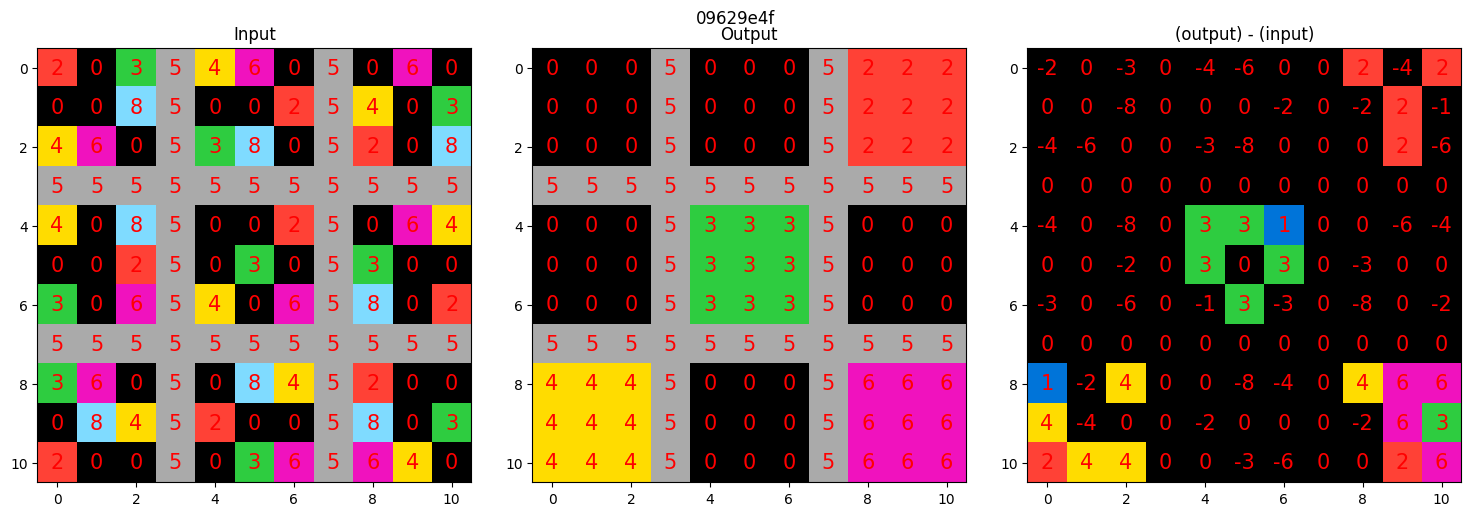

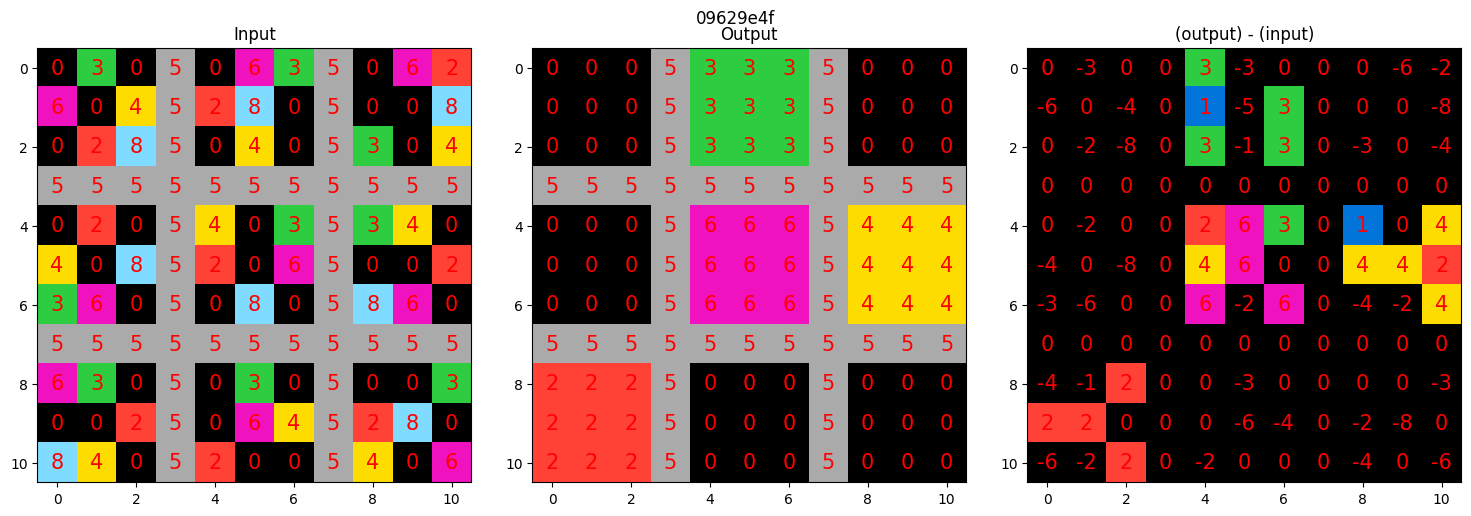

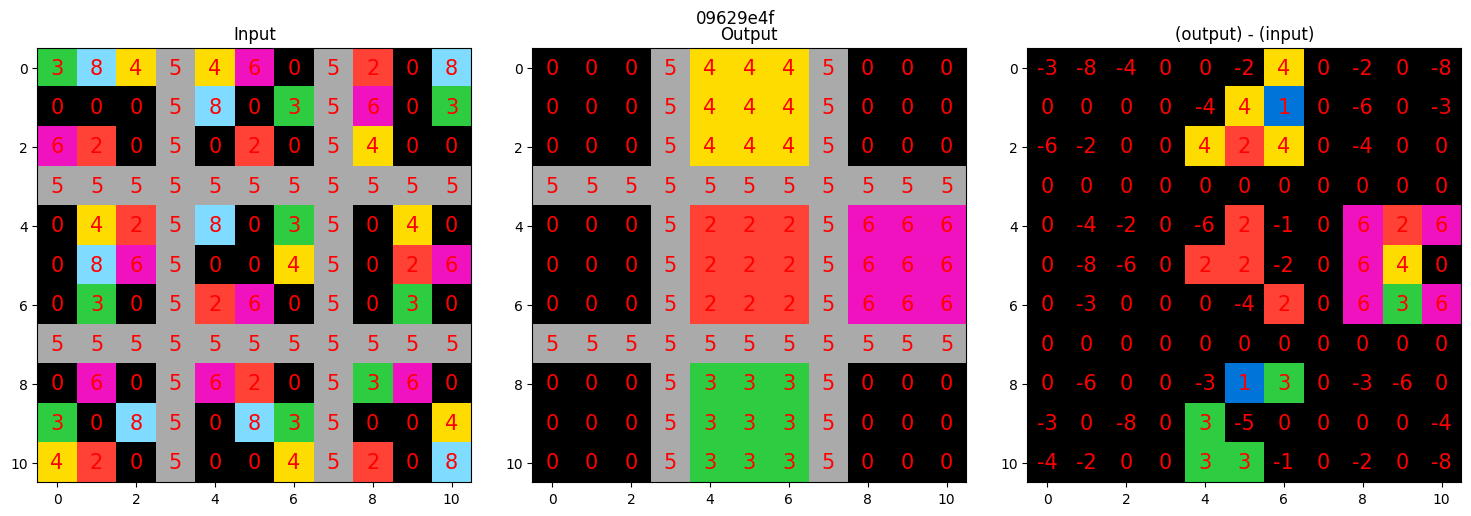

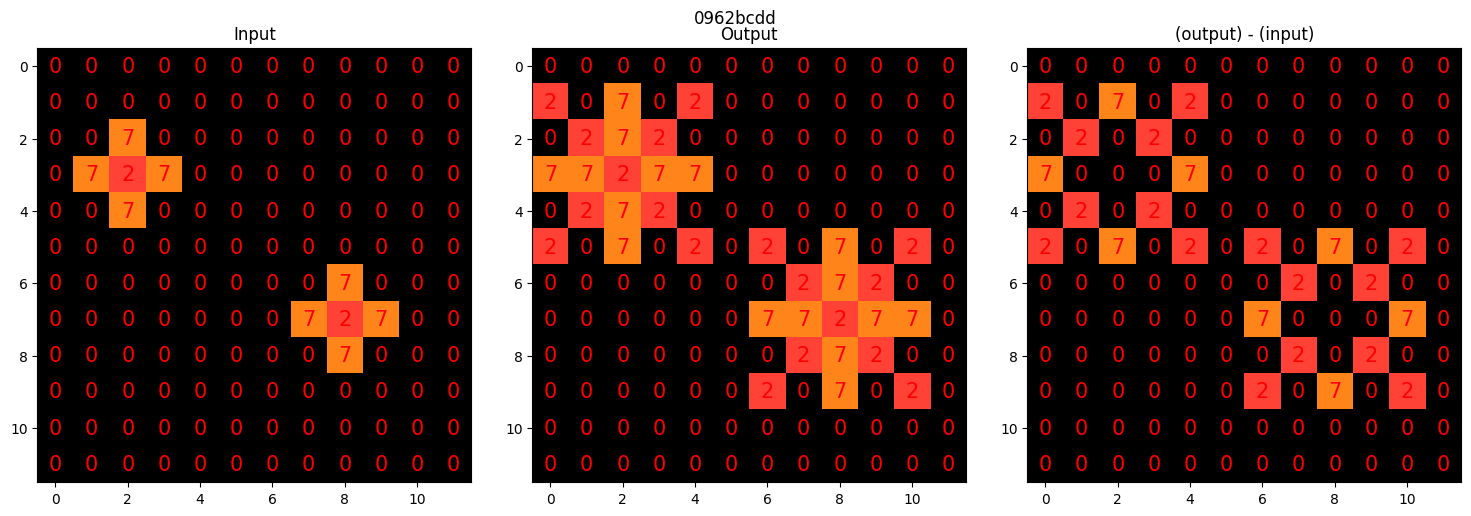

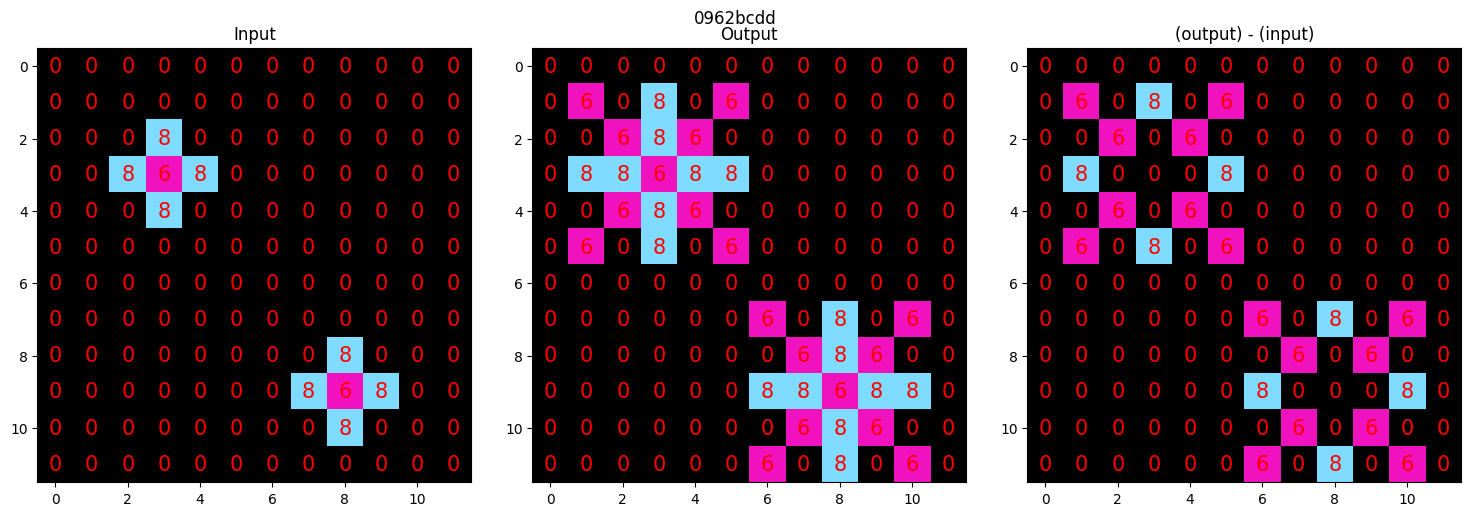

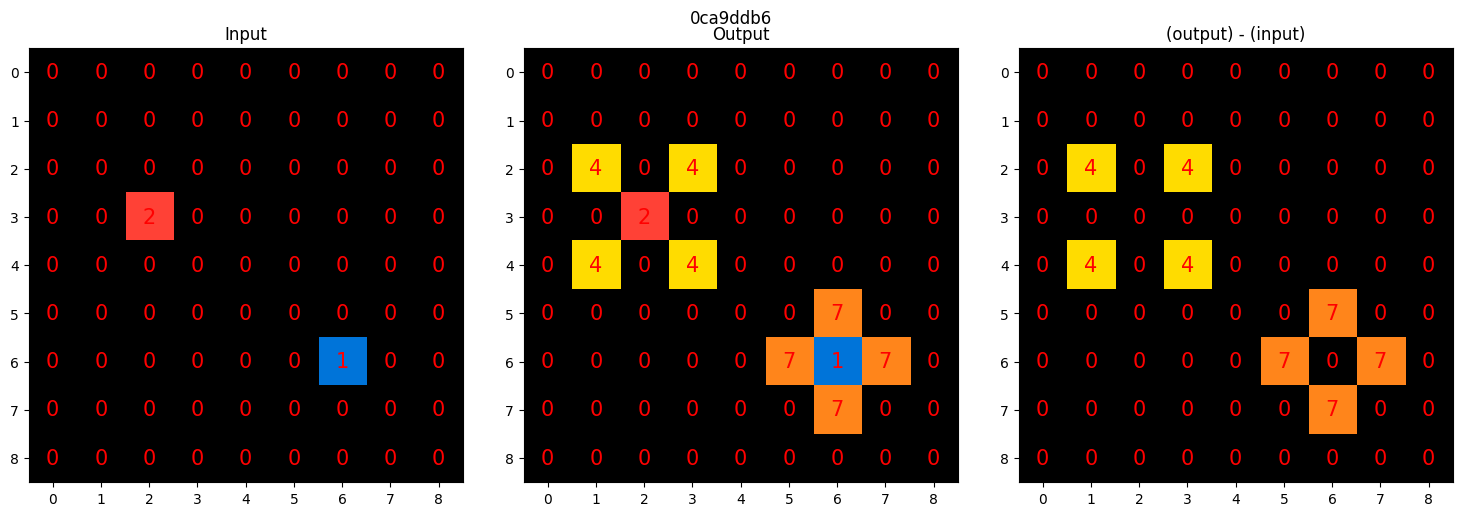

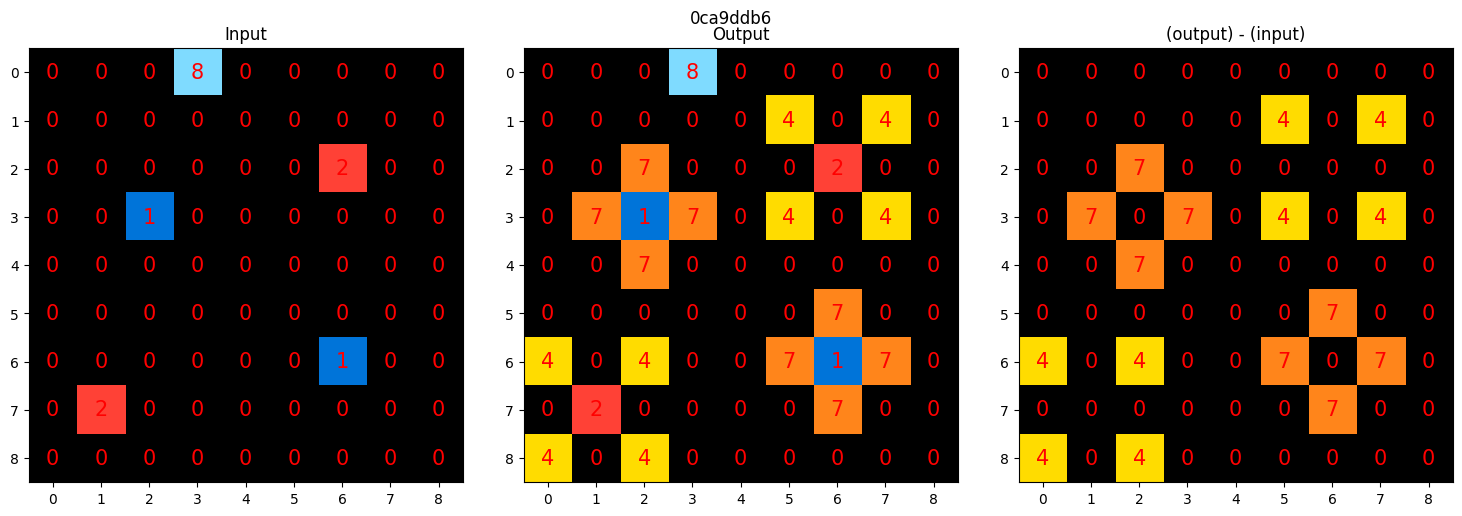

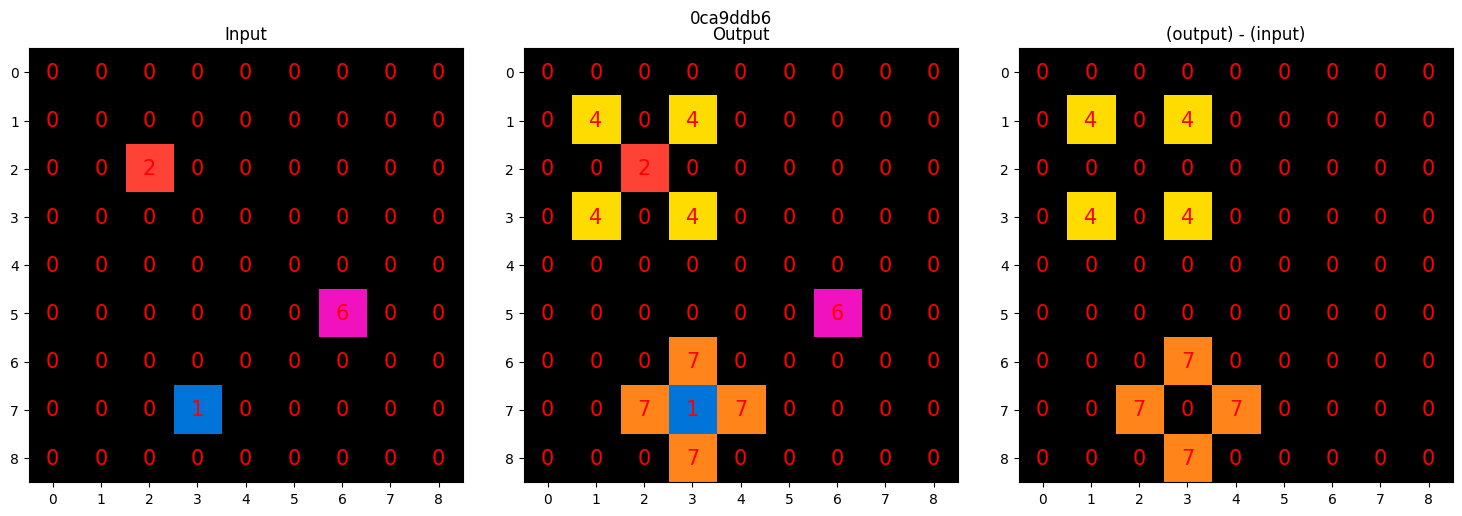

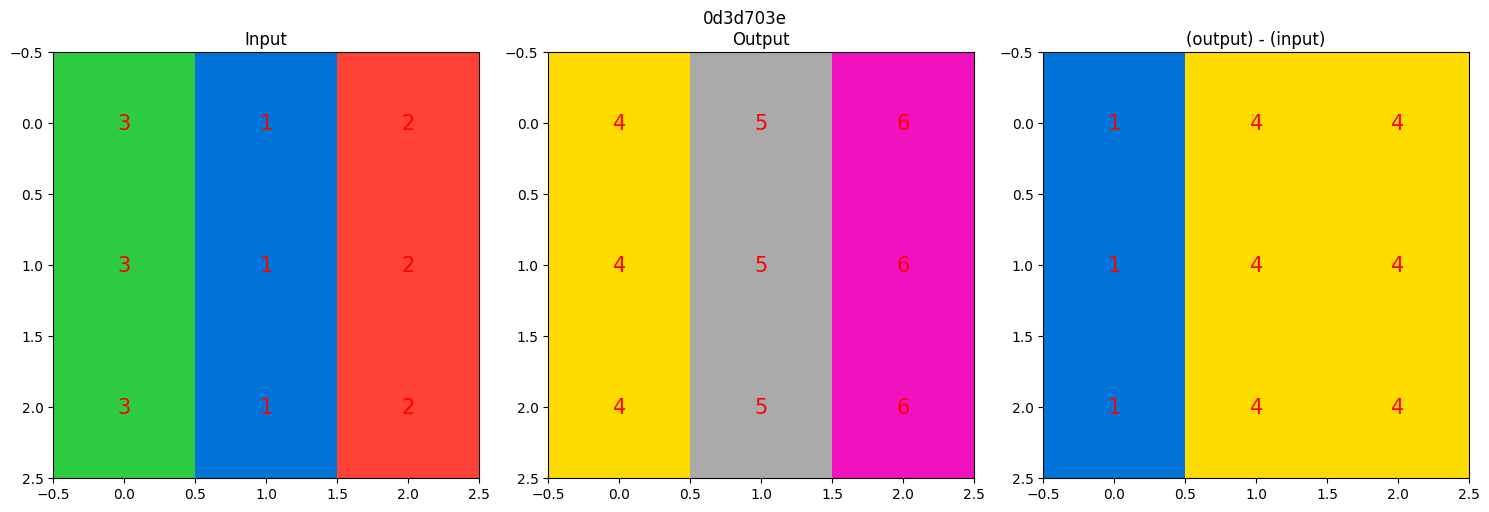

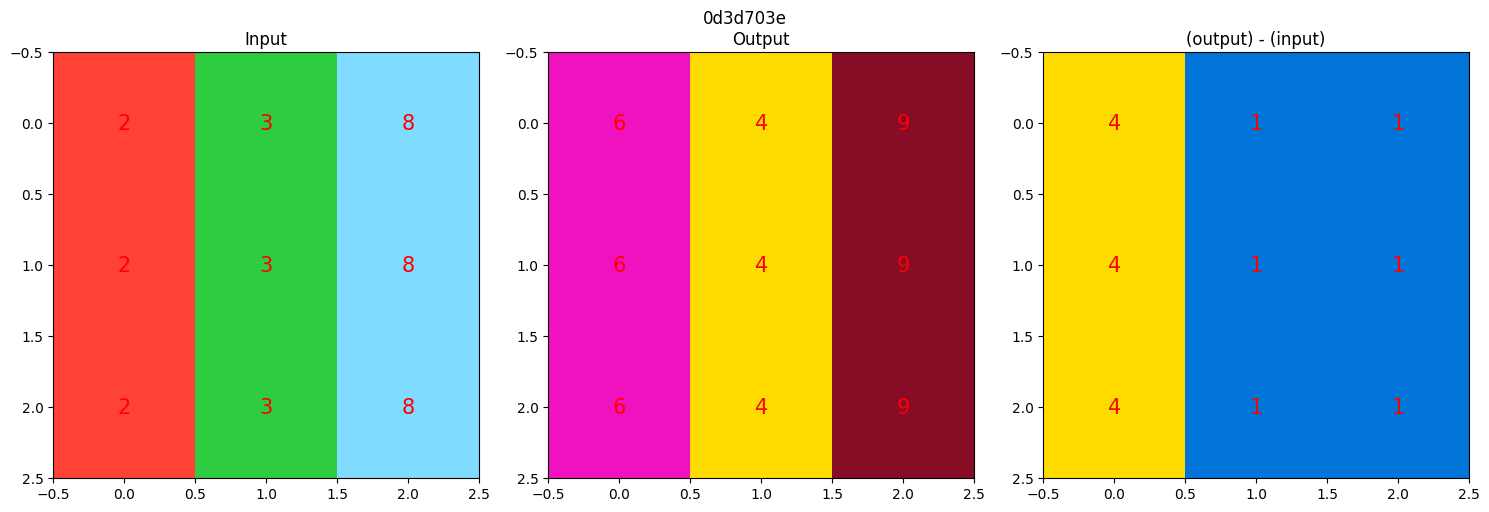

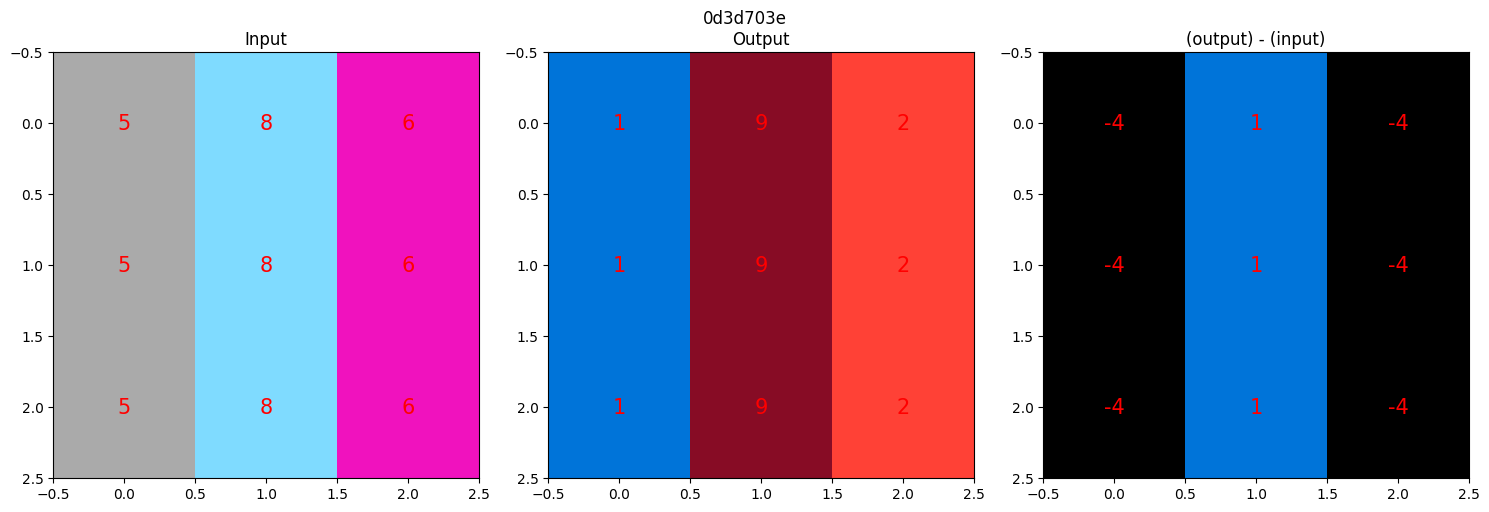

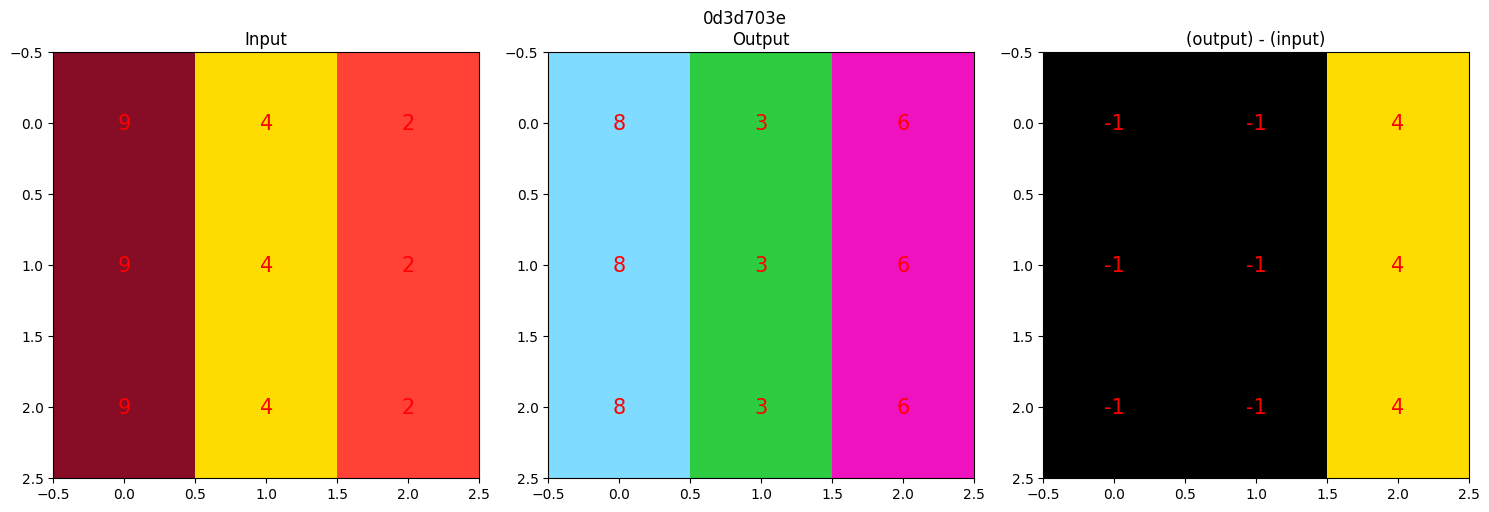

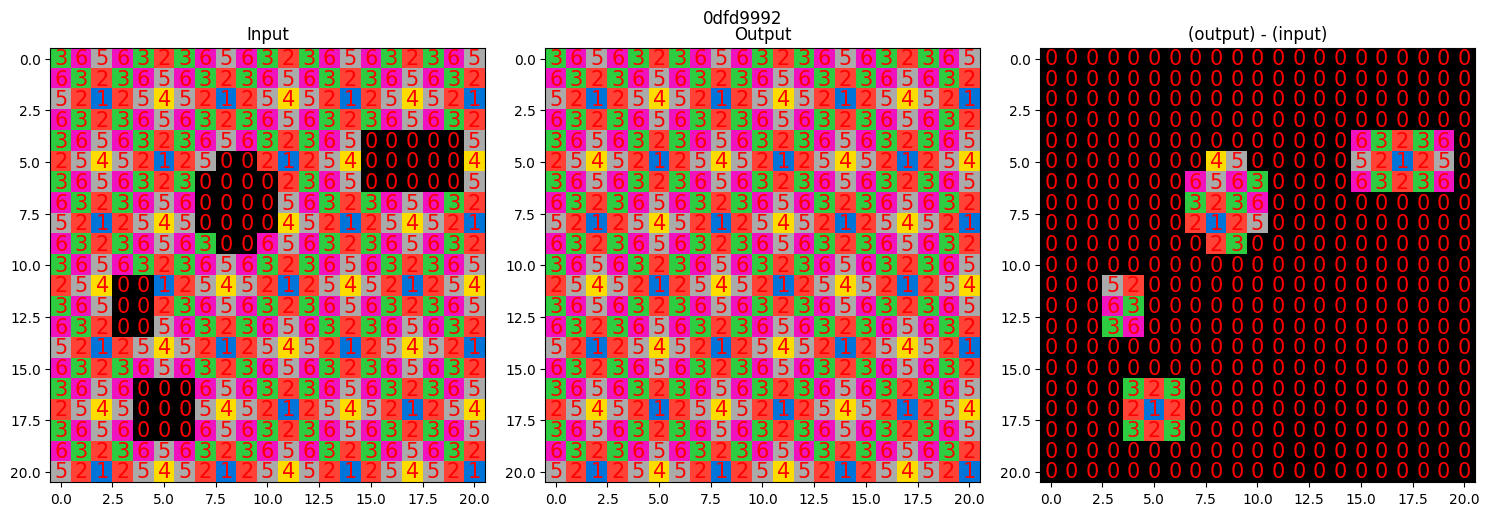

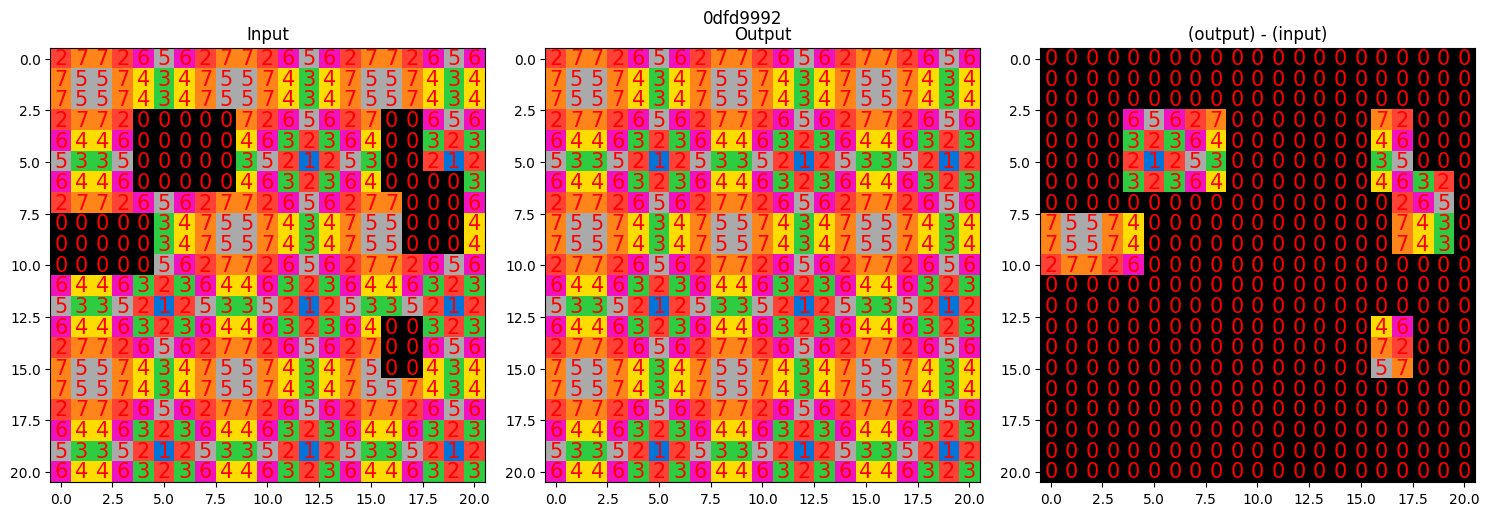

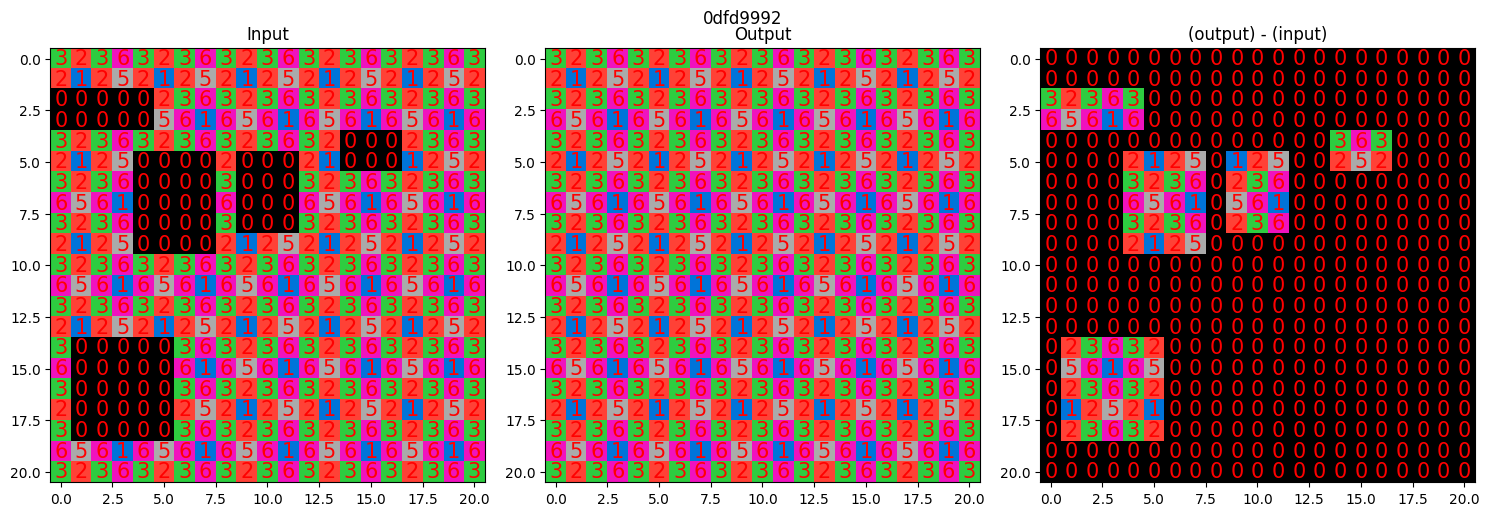

In [9]:
for challenge_id in batch_1:
    train_dic = training_challenges[challenge_id]['train']
    for pair in train_dic:
        x,y,z = get_matrix_pair(pair)
        ploting_exercices(challenge_id, x,y,z)

posible modification:

* Try traspose and others operations.
* Create another dataset with only input challenge and not solutions, for Clasification analysis of inputs.

** I was thinking on implement graphs to seach patterns in matrix.*